In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [2]:
import datetime as dt

In [3]:
dt.datetime(2021, 3, 2)

datetime.datetime(2021, 3, 2, 0, 0)

In [4]:
now = dt.datetime.now()

In [5]:
now

datetime.datetime(2021, 7, 9, 9, 27, 6, 552594)

In [6]:
# 타임존 지정해서 날짜 생성
dt.datetime(2021, 3, 2, 13, 50, tzinfo = dt.timezone.utc)

datetime.datetime(2021, 3, 2, 13, 50, tzinfo=datetime.timezone.utc)

In [7]:
dt.datetime.now(tz = dt.timezone.utc)

datetime.datetime(2021, 7, 9, 0, 28, 12, 591918, tzinfo=datetime.timezone.utc)

In [8]:
now.astimezone(dt.timezone.utc)

datetime.datetime(2021, 7, 9, 0, 27, 6, 552594, tzinfo=datetime.timezone.utc)

## 1.2 timedelta 를 활용한 시간 계산

In [9]:
from datetime import timedelta

In [10]:
# 현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days = 100)

datetime.datetime(2021, 10, 17, 9, 27, 6, 552594)

In [ ]:
# 현재 시간 기준으로 1시간 25분 후의 시간
now + timedelta(hours = 1, minutes = 25)

In [12]:
# 두 날짜 간의 차이 계산
dt1 = dt.datetime(2021, 3, 2, 9, 30)
dt2 = dt.datetime(2023, 5, 18, 13, 15)

In [13]:
diff = dt2 - dt1

In [14]:
diff

datetime.timedelta(days=807, seconds=13500)

In [15]:
diff.seconds//3600 #시간

3

In [17]:
diff.seconds//60%60 #분

45

## 1.3 시계열 데이터 처리

In [18]:
import random
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [19]:
print(sample.date.min(), sample.date.max())

2021-01-01 00:00:00 2022-05-15 00:00:00


In [21]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용

sample[(sample.date >= '2021-07-01') & (sample.date <= '2021-07-31')]

,date,count
181,2021-07-01,433
182,2021-07-02,132
183,2021-07-03,834
184,2021-07-04,277
185,2021-07-05,473
186,2021-07-06,997
187,2021-07-07,649
188,2021-07-08,628
189,2021-07-09,590
190,2021-07-10,61


In [23]:
pd.date_range(start = '2021-07-01', end = '2021-07-31')

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용

sample[sample.date.isin(pd.date_range(start = '2021-07-01', end = '2021-07-31'))]

,date,count
181,2021-07-01,433
182,2021-07-02,132
183,2021-07-03,834
184,2021-07-04,277
185,2021-07-05,473
186,2021-07-06,997
187,2021-07-07,649
188,2021-07-08,628
189,2021-07-09,590
190,2021-07-10,61


In [26]:
# 7월달 데이터마 조회 #3
# datetimeIndex 활용

sample2 = sample.set_index('date')

In [27]:
sample2.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-14', '2022-05-15'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

- datetimeIndex 색인

In [28]:
# 2021년 데이터 선택

sample2['2021']

C:\anaconda\envs\test3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,count
date,
2021-01-01,139
2021-01-02,388
2021-01-03,446
2021-01-04,307
2021-01-05,201
...,...
2021-12-27,321
2021-12-28,643
2021-12-29,281


In [29]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

,count
date,
2021-03-02,354
2021-03-03,826
2021-03-04,571
2021-03-05,957
2021-03-06,31
2021-03-07,114
2021-03-08,63
2021-03-09,712
2021-03-10,836


In [32]:
# 2021년 4월 28일 데이터 선택
sample2.loc['2021-04-28']

count    256
Name: 2021-04-28 00:00:00, dtype: int64

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [34]:
문자열 = '21/08/11'
문자열

'21/08/11'

In [35]:
# 21년 8월 11일로 변환 
dt.datetime.strptime(문자열, '%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [36]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열, '%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [38]:
# 8월 11일 21시로 변환
dt1 = dt.datetime.strptime(문자열, '%H/%m/%d')

In [39]:
# dt1의 year를 2021로 업데이트
# dt1.year = 2021
dt1.replace(year = 2021)

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [40]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,2020-07-01,78
1,2020-07-02,46
2,2020-07-05,23
3,2020-07-10,2
4,2020-07-23,30
5,2020-07-24,68
6,2020-07-28,69
7,2020-08-05,77
8,2020-08-10,36
9,2020-08-23,62


In [42]:
# 위에서 배운대로 해도 정상적으로 동작하지 않음

df.set_index('date')['2020-07']

KeyError: '2020-07'

In [44]:
# 해결책. df의 date컬럼의 타입을 datetime으로 변환
# 1. strptime() 활용
df['date2'] = df.date.apply(lambda X: dt.datetime.strptime(X, '%Y-%m-%d'))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [46]:
# 2. 
df['date3'] = pd.to_datetime(df.date, format = '%Y-%m-%d')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [49]:
# 7월 데이터만 조회
df.set_index('date3')['2020-07']

C:\anaconda\envs\test3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,date,value,date2
date3,,,
2020-07-01,2020-07-01,78,2020-07-01
2020-07-02,2020-07-02,46,2020-07-02
2020-07-05,2020-07-05,23,2020-07-05
2020-07-10,2020-07-10,2,2020-07-10
2020-07-23,2020-07-23,30,2020-07-23
2020-07-24,2020-07-24,68,2020-07-24
2020-07-28,2020-07-28,69,2020-07-28


## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [50]:
# now 변수를 4자리년도-월-일 형식으로 출력
now.strftime('%Y-%m-%d')

'2021-07-09'

In [52]:
dt.datetime.strftime(now, '%Y-%m-%d')

'2021-07-09'

In [54]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('%m-%d %H:%M')

'07-09 09:27'

* Tip. Week와 요일 정보 얻기(strftime)

In [133]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [55]:
df.drop(['date2','date3'], axis=1, inplace=True)

In [56]:
df['date'] = pd.to_datetime(df.date)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [58]:
now.strftime('%V')

'27'

In [60]:
now.strftime('%w')

'5'

In [63]:
#df에  week number(%V), weekday(%w) 컬럼 추가
df['weekNumber'] = df.date.apply(lambda X: X.strftime('%V'))
df['weekDay'] = df.date.apply(lambda X: X.strftime('%a'))

In [64]:
df

,date,value,weekNumber,weekDay
0,2020-07-01,78,27,Wed
1,2020-07-02,46,27,Thu
2,2020-07-05,23,27,Sun
3,2020-07-10,2,28,Fri
4,2020-07-23,30,30,Thu
5,2020-07-24,68,30,Fri
6,2020-07-28,69,31,Tue
7,2020-08-05,77,32,Wed
8,2020-08-10,36,33,Mon
9,2020-08-23,62,34,Sun


##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [65]:
df.pivot_table(index = 'weekNumber', aggfunc='sum', values ='value')

,value
weekNumber,
27,147
28,2
30,98
31,69
32,77
33,36
34,62


##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [66]:
df.pivot_table(index = 'weekNumber', aggfunc='mean', values ='value')

,value
weekNumber,
27,49
28,2
30,49
31,69
32,77
33,36
34,62


## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [77]:
import openpyxl
covid = pd.read_excel('data/owid-covid-data.xlsx', engine='openpyxl')

In [78]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [79]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [80]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              67325 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            69938 non-null  float64
 5   new_cases                              69936 non-null  float64
 6   new_cases_smoothed                     68935 non-null  float64
 7   total_deaths                           60914 non-null  float64
 8   new_deaths                             61072 non-null  float64
 9   new_deaths_smoothed                    68935 non-null  float64
 10  total_cases_per_million                69555 non-null  float64
 11  ne

##### 2. date 컬럼을 datetime으로 변경하기

In [81]:
covid.date = pd.to_datetime(covid.date, format='%Y-%m-%d')

In [82]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               70851 non-null  object        
 1   continent                              67325 non-null  object        
 2   location                               70851 non-null  object        
 3   date                                   70851 non-null  datetime64[ns]
 4   total_cases                            69938 non-null  float64       
 5   new_cases                              69936 non-null  float64       
 6   new_cases_smoothed                     68935 non-null  float64       
 7   total_deaths                           60914 non-null  float64       
 8   new_deaths                             61072 non-null  float64       
 9   new_deaths_smoothed                    68935 non-null  float6

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [83]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

- location, date, total_cases, new_cases 컬럼만 선택

In [84]:
covid = covid[['location', 'date', 'total_cases', 'new_cases']]

#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [89]:
# 매월 마지막 날짜 데이터만 선택
ex1 = covid[covid.date.isin(pd.date_range(start = covid.date.min(),
                                          end = covid.date.max(),
                                          freq = 'M'))]

In [90]:
ex1.set_index(['date','location']).unstack()

total_cases                                      new_cases  \
location        Brazil     France South Korea United States    Brazil   
date                                                                    
2020-01-31         NaN        5.0        11.0           8.0       NaN   
2020-02-29         2.0      100.0      3150.0          25.0       1.0   
2020-03-31      5717.0    52278.0      9786.0      192301.0    1138.0   
2020-04-30     87187.0   168861.0     10774.0     1081019.0    7502.0   
2020-05-31    514849.0   190975.0     11503.0     1798713.0   16409.0   
2020-06-30   1402041.0   204244.0     12850.0     2642081.0   33846.0   
2020-07-31   2662485.0   227239.0     14336.0     4566931.0   52383.0   
2020-08-31   3908272.0   321160.0     20182.0     6025593.0   45961.0   
2020-09-30   4810935.0   605893.0     23889.0     7231832.0   33413.0   
2020-10-31   5535605.0  1414364.0     26635.0     9158771.0   18947.0   
2020-11-30   6335878.0  2276874.0     34652.0    13655220.0   21138.0   
2020-12-31   7675973.0  2677666.0     61769.0    20061903.0   56773.0   
2021-01-31   9204731.0  3255920.0     78508.0    26187035.0   27756.0   

                                               
location     France South Korea United States  
date                                           
2020-01-31      0.0         7.0           2.0  
2020-02-29     43.0       813.0           8.0  
2020-03-31   7629.0       125.0       26314.0  
2020-04-30   1218.0         9.0       29220.0  
2020-05-31    231.0        35.0       18987.0  
2020-06-30    441.0        50.0       46426.0  
2020-07-31   1308.0        31.0       68697.0  
2020-08-31   3113.0       235.0       35475.0  
2020-09-30  14366.0        77.0       39334.0  
2020-10-31  35070.0       124.0       89668.0  
2020-11-30   4354.0       451.0      160116.0  
2020-12-31  20042.0      1029.0      234133.0  
2021-01-31  19235.0       303.0      111857.0

<AxesSubplot:xlabel='date'>

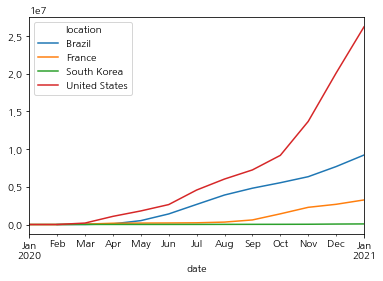

In [91]:
ex1.set_index(['date','location']).unstack()['total_cases'].plot()

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

In [92]:
covid['year'] = covid.date.apply(lambda X: X.strftime('%Y'))
covid['month'] = covid.date.apply(lambda X: X.strftime('%m'))
covid['day'] = covid.date.apply(lambda X: X.strftime('%d'))
covid['weekNumber'] = covid.date.apply(lambda X: X.strftime('%U'))
covid['weekDay'] = covid.date.apply(lambda X: X.strftime('%a'))
# covid.date.apply(lambda X: X.strftime('%Y'))

In [93]:
# 쿼터(분기) 정보 추가
covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)

- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [94]:
covid.pivot_table(index = 'weekDay', aggfunc = 'sum', values = 'new_cases')

,new_cases
weekDay,
Fri,6754862.0
Mon,4810652.0
Sat,6307617.0
Sun,4892651.0
Thu,6766153.0
Tue,6278893.0
Wed,6486294.0


- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

In [95]:
covid.pivot_table(index = 'quarter', columns = 'location',
                  aggfunc = 'sum', values = 'new_cases')

location,Brazil,France,South Korea,United States
quarter,,,,
1,2587619.0,1064146.0,36136.0,8391992.0
2,1396324.0,151966.0,3064.0,2449780.0
3,3408894.0,401649.0,11039.0,4589751.0
4,2865038.0,2071773.0,37880.0,12830071.0


<AxesSubplot:xlabel='year,quarter'>

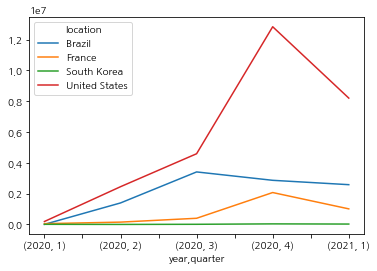

In [97]:
covid.pivot_table(index = ['year','quarter'], columns = 'location',
                  aggfunc = 'sum', values = 'new_cases').plot()